**METADATA**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [34]:
#importing the dataset
f_mnist=tf.keras.datasets.fashion_mnist

#loading the dataset
(x_train,y_train),(x_test,y_test)=f_mnist.load_data()

Q1:Find the number of classes.

In [35]:
print('The number of classes are: ')
display(len(np.unique(y_train)))

The number of classes are: 


10

Infernce:There are 10 clases in total.

Q2:Find the dimensions of each image.

In [36]:
#shape of the training data
x_train.shape

(60000, 28, 28)

In [37]:
#shape of the testing data
x_test.shape

(10000, 28, 28)

Inference: Hence the dimensions of each image are 28*28

Q3: Display one image from each class.

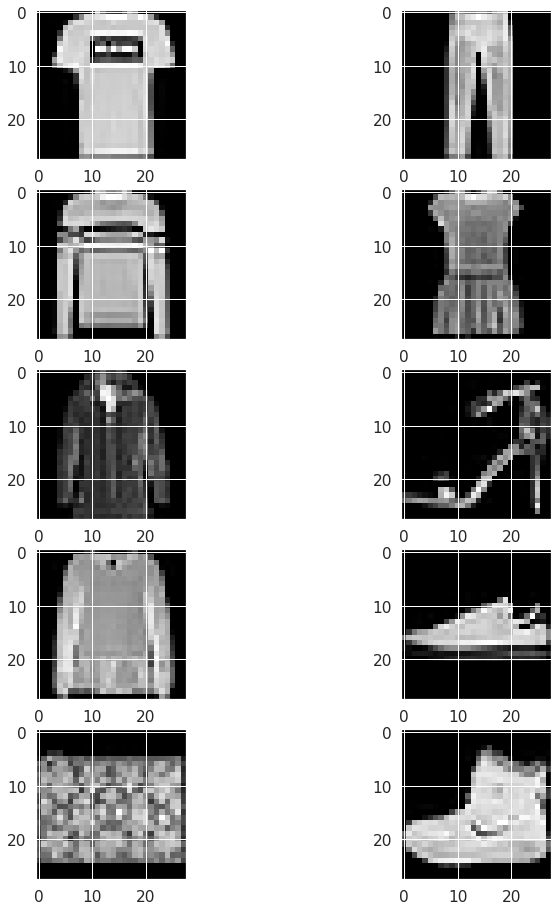

In [69]:
(x,id) = np.unique(y_train, return_index=True)
plt.figure(figsize=(12,16))
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(x_train[id[i]],cmap="gray")

Q4:Perform normalization.

**Normalization**

In [40]:
np.max(x_train[0])

255

In [41]:
np.min(x_train[0])

0

In [42]:
#normalizing training data
x_train=x_train/255.0

In [43]:
#normalizing test data
x_test=x_test/255.0

Q5:Build two neural networks with 2 hidden layers and 5 hidden layers.

In [44]:
model1=tf.keras.Sequential()
#this model will have 2 hidden layers
model1.add(tf.keras.layers.Flatten(input_shape=[28,28],name="InputLayer")) 
model1.add(tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"))
model1.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"))
model1.add(tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"))   

model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Q6: Train and test the above two networks.

In [45]:
history_1=model1.fit(x_train,y_train,batch_size=32,epochs=14,validation_split=0.1)  

Epoch 1/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4856 - accuracy: 0.8256 - val_loss: 0.4210 - val_accuracy: 0.8438
Epoch 2/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3665 - accuracy: 0.8640 - val_loss: 0.3574 - val_accuracy: 0.8697
Epoch 3/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3293 - accuracy: 0.8792 - val_loss: 0.3378 - val_accuracy: 0.8797
Epoch 4/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.8872 - val_loss: 0.3494 - val_accuracy: 0.8757
Epoch 5/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2845 - accuracy: 0.8933 - val_loss: 0.3490 - val_accuracy: 0.8797
Epoch 6/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.9009 - val_loss: 0.3842 - val_accuracy: 0.8630
Epoch 7/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9026 - val_loss: 0.3194 - val_accuracy:

In [46]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8830


[0.3758091926574707, 0.8830000162124634]

In [47]:
model2=tf.keras.Sequential()
#this model will have 5 hidden layers
model2.add(tf.keras.layers.Flatten(input_shape=[28,28],name="InputLayer")) 
model2.add(tf.keras.layers.Dense(400,activation="relu",name="hiddenLayer1"))
model2.add(tf.keras.layers.Dense(220,activation="relu",name="hiddenLayer2"))
model2.add(tf.keras.layers.Dense(110,activation="relu",name="hiddenLayer3"))
model2.add(tf.keras.layers.Dense(65,activation="relu",name="hiddenLayer4"))
model2.add(tf.keras.layers.Dense(30,activation="relu",name="hiddenLayer5"))
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"))   

model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 400)               314000    
                                                                 
 hiddenLayer2 (Dense)        (None, 220)               88220     
                                                                 
 hiddenLayer3 (Dense)        (None, 110)               24310     
                                                                 
 hiddenLayer4 (Dense)        (None, 65)                7215      
                                                                 
 hiddenLayer5 (Dense)        (None, 30)                1980      
                                                                 
 outputLayer (Dense)         (None, 10)               

In [48]:
history_2=model2.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.1)  

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5099 - accuracy: 0.8155 - val_loss: 0.3924 - val_accuracy: 0.8555
Epoch 2/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3828 - accuracy: 0.8587 - val_loss: 0.4020 - val_accuracy: 0.8640
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8763 - val_loss: 0.3589 - val_accuracy: 0.8687
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3201 - accuracy: 0.8823 - val_loss: 0.3398 - val_accuracy: 0.8790
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2981 - accuracy: 0.8907 - val_loss: 0.3544 - val_accuracy: 0.8768
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.8943 - val_loss: 0.3316 - val_accuracy: 0.8780
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.9006 - val_loss: 0.3322 - val_accuracy:

In [49]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8901


[0.35270705819129944, 0.8901000022888184]

Q7:Compare their performances.

**Model-1**

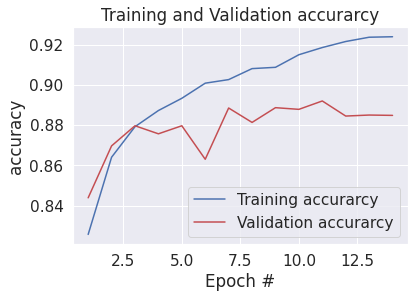

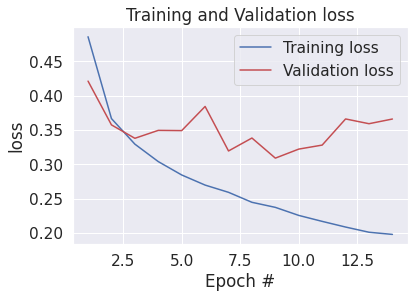

In [50]:
sns.set_style("darkgrid")

#get the details form the history object
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Inference: Here training and validation accuracy both are increasing simultaneously whereas training and validation loss both are decreasing simultaneously again which tells that this is a good model.

**Model-2**

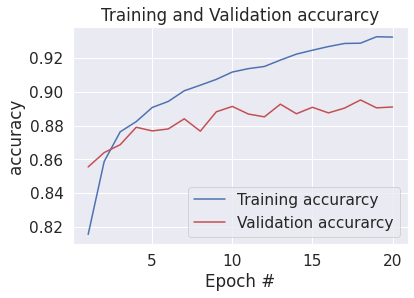

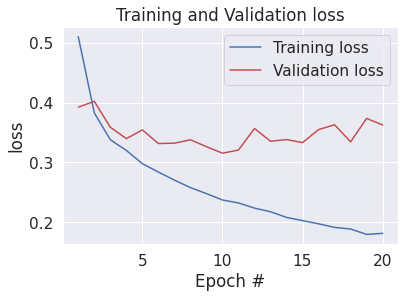

In [51]:
sns.set_style("darkgrid")

#get the details form the history object
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Inference: Here training and validation accuracy both are increasing simultaneously whereas training and validation loss both are decreasing simultaneously again which tells that this is again a good model.

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = model1.predict(x_test, len(y_test)//32)
Y_pred2 = model2.predict(x_test, len(y_test)//32)

In [53]:
y_pred1 = np.argmax(Y_pred1, axis=1)
y_pred2 = np.argmax(Y_pred2, axis=1)

In [54]:
#printing confusion matrix for 1st model
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[854   6  16  24   6   1  87   0   6   0]
 [  2 982   1   8   5   0   1   0   1   0]
 [ 19   2 776  12 152   0  38   0   1   0]
 [ 19  19   7 889  54   0   9   0   3   0]
 [  0   0  74  19 885   0  21   0   1   0]
 [  0   0   0   0   0 965   0  22   1  12]
 [143   0  78  38 162   0 575   0   4   0]
 [  0   0   0   0   0   7   0 982   0  11]
 [  6   0   3   2   8   2   7   4 968   0]
 [  1   0   0   0   0   9   1  35   0 954]]


In [55]:
#printing confusion matrix for 2nd model
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[879   1  12  29   4   1  70   0   4   0]
 [  1 974   1  19   2   0   2   0   1   0]
 [ 15   0 811  13  59   0 101   0   1   0]
 [ 14   4   9 925  25   0  20   0   3   0]
 [  2   0 110  36 786   0  65   0   1   0]
 [  0   0   0   0   1 953   0  16   1  29]
 [140   0  59  36  66   0 693   0   6   0]
 [  0   0   0   0   0  10   0 935   0  55]
 [  5   0   3   7   3   2   4   7 967   2]
 [  0   0   0   1   0   4   1  16   0 978]]


**Model-1**

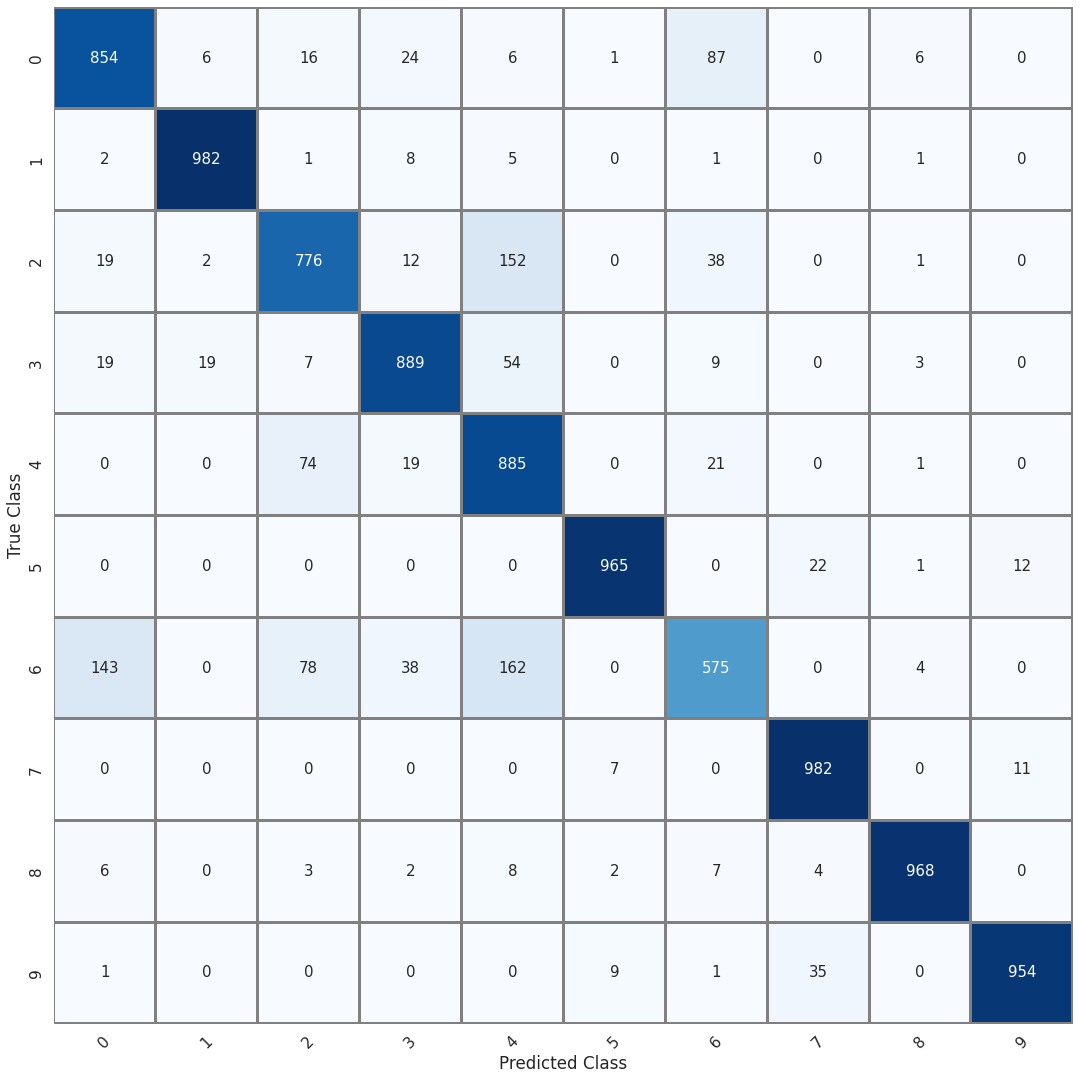

In [56]:
array_downsize_upsize_random_1 = cm1

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix_1 = pd.DataFrame(array_downsize_upsize_random_1, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix_1, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

**Model-2**

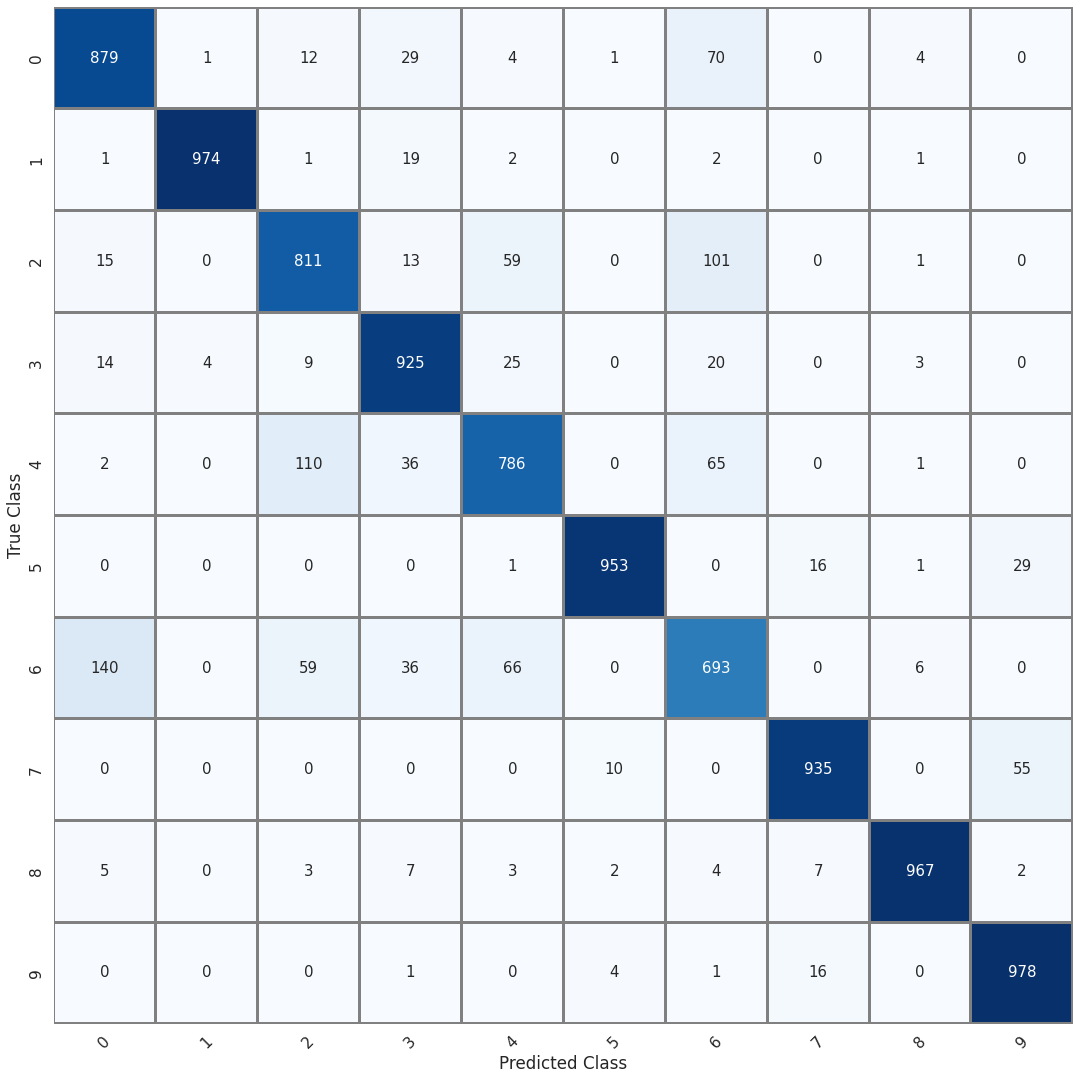

In [57]:
array_downsize_upsize_random_2 = cm2

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix_2 = pd.DataFrame(array_downsize_upsize_random_2, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix_2, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

In [58]:
#printing accuracies of both the models
from sklearn import metrics
print("Model 1: ", metrics.accuracy_score(y_test, y_pred1))
print("Model 2: ", metrics.accuracy_score(y_test, y_pred2))

Model 1:  0.883
Model 2:  0.8901


Infernce:
* 1: If we compare both the models on the basis of confusion matrix then we will see that in both the models diffeerent classes have different number of missclassifications. In some classes for example class-6 there are high number of missclassifications in both the cases yet it's slightly better in case of model 1. But in another case of class 2 there are higher number of missclassifications in case of model-1. Hence we conclude that missclassifications cannot be the parameter here to compare both the models.

* 2: If we compare the above models on the basis of accuracy then we will see that accuracy of model-2 is slightly better than the accuracy of model-1. Hence we conculde that model-2 is better than model-1 for classifaction .